<div style="text-align: center;">
    <img src="images/Marca Leandra Jaramillo.png" alt="Logo personal" style="width:25%;">
</div>

# **Captura continua de emociones y percepciones: El futuro de las mediciones en la gestión de personas. Comparación de un enfoque manual y otro automatizado en un estudio de clima organizacional**

## **Pregunta de Investigación:**

**¿En qué medida los enfoques manuales y automatizados ofrecen resultados complementarios para identificar las percepciones y emociones de los empleados en estudios de clima organizacional?**

El presente cuaderno de trabajo expone un análisis detallado de un estudio de clima organizacional realizado durante el año 2019, utilizando la escala EDCO como herramienta principal de medición. Además de las preguntas cerradas habituales, **se incluyeron dos preguntas abiertas con el objetivo de descubrir patrones ocultos que la encuesta cuantitativa no lograba capturar y, de esta manera, profundizar en las emociones y percepciones de los trabajadores.**

En el análisis original, se utilizó el **método de la teoría fundamentada para interpretar de forma manual las respuestas obtenidas**, un proceso llevado a cabo íntegramente en Excel. Este enfoque permitió generar categorías que reflejaban las preocupaciones y sentimientos más frecuentes de los empleados, pero también representó un proceso intensivo en tiempo y esfuerzo.

Ahora, en 2024, este cuaderno de trabajo propone un enfoque más innovador al aplicar técnicas de ciencia de datos a los mismos resultados cualitativos. Utilizando tres métodos avanzados: análisis de sentimiento, nubes de palabras, y modelado de temas (LDA), se demuestra cómo las herramientas tecnológicas pueden acelerar y automatizar el proceso de análisis de datos cualitativos. Estos métodos permiten capturar emociones y percepciones de manera más ágil. 

Este caso de estudio no solo busca validar los resultados obtenidos previamente, sino también explorar cómo los **enfoques modernos y automatizados a través de la Ciencia de los datos,  pueden profundizar el entendimiento del clima organizacional y proporcionar insights valiosos para la toma de decisiones más efectiva en la gestión de personas.**

* **Paso 1: Carga del archivo**

In [1]:
import os

# Visulizar la ruta del archivo 
os.getcwd()

'C:\\Users\\Leandra\\estudio de clima'

In [2]:
import pandas as pd

# Ruta completa del archivo
file_path = r'C:\\Users\\Leandra\\estudio de clima\\Clima.xlsx'

# Cargar el archivo para el análisis
df = pd.read_excel(file_path)

# Mostrar las primeras filas para verificar que se ha cargado correctamente
df.head()

,¿Qué sugerencias daría usted para que la empresa mejore cada día más?,¿Qué debe hacer la empresa para que sus colaboradores mejoren su rendimiento?
0,Cumplir con el reglamento que tiene,Resolver el problema de trabajar con 3 formas:...
1,Tomar las opiniones de los demás-Mejorar la si...,-Incidir en su capacitación -Incentivar el esf...
2,En general las personas deben de identificarse...,-Mejorar sus remuneraciones -Dar seguro de sal...
3,Que cada área cumpla con su manual de procedim...,Capacitarlos t hacer que los trabajadores den ...
4,Adquirir instrumentos o equipos para comunicar...,*Lograr una mayor integración e internalizació...


* **Paso 2: Preprocesamiento de los datos**

In [3]:
import nltk
from nltk.corpus import stopwords
import os

# Verificar si las stopwords ya están descargadas
try:
    # Intentar cargar las stopwords
    spanish_stopwords = stopwords.words('spanish')
except LookupError:
    # Si no están disponibles, descargarlas
    nltk.download('stopwords')
    spanish_stopwords = stopwords.words('spanish')

# Preprocesar las columnas de preguntas
df['preprocessed_pregunta_mejora'] = df['¿Qué sugerencias daría usted para que la empresa mejore cada día más?'].dropna().apply(lambda x: ' '.join([word for word in x.lower().split() if word not in spanish_stopwords]))
df['preprocessed_pregunta_rendimiento'] = df['¿Qué debe hacer la empresa para que sus colaboradores mejoren su rendimiento?'].dropna().apply(lambda x: ' '.join([word for word in x.lower().split() if word not in spanish_stopwords]))

# Mostrar los resultados del preprocesamiento
print(df[['preprocessed_pregunta_mejora', 'preprocessed_pregunta_rendimiento']].head())

                        preprocessed_pregunta_mejora  \
0                                 cumplir reglamento   
1  tomar opiniones demás-mejorar situación labora...   
2  general personas deben identificarse empresa -...   
3             cada área cumpla manual procedimientos   
4  adquirir instrumentos equipos comunicarse mejo...   

                   preprocessed_pregunta_rendimiento  
0  resolver problema trabajar 3 formas: 1. nombra...  
1  -incidir capacitación -incentivar esfuerzo. -m...  
2  -mejorar remuneraciones -dar seguro salud aque...  
3     capacitarlos t hacer trabajadores den mejor si  
4  *lograr mayor integración internalización, com...  


* **Paso 3: Aplicación de la técnica de nube de palabras para descubrir patrones clave**

La nube de palabras es una **técnica de visualización utilizada en el análisis de datos textuales** para identificar las palabras más frecuentes dentro de un conjunto de textos. Esta herramienta gráfica permite representar las palabras de mayor relevancia mediante un formato visual en el que el tamaño de cada palabra es proporcional a su frecuencia de aparición en el texto.

Es especialmente útil para identificar rápidamente los temas o términos más comunes en los comentarios, opiniones o respuestas abiertas, ofreciendo una visión intuitiva de los patrones de lenguaje que podrían pasar desapercibidos en un análisis manual. Las nubes de palabras son ideales para obtener una visión inicial de los datos cualitativos, facilitando la extracción de temas clave antes de aplicar técnicas más profundas de análisis de texto.

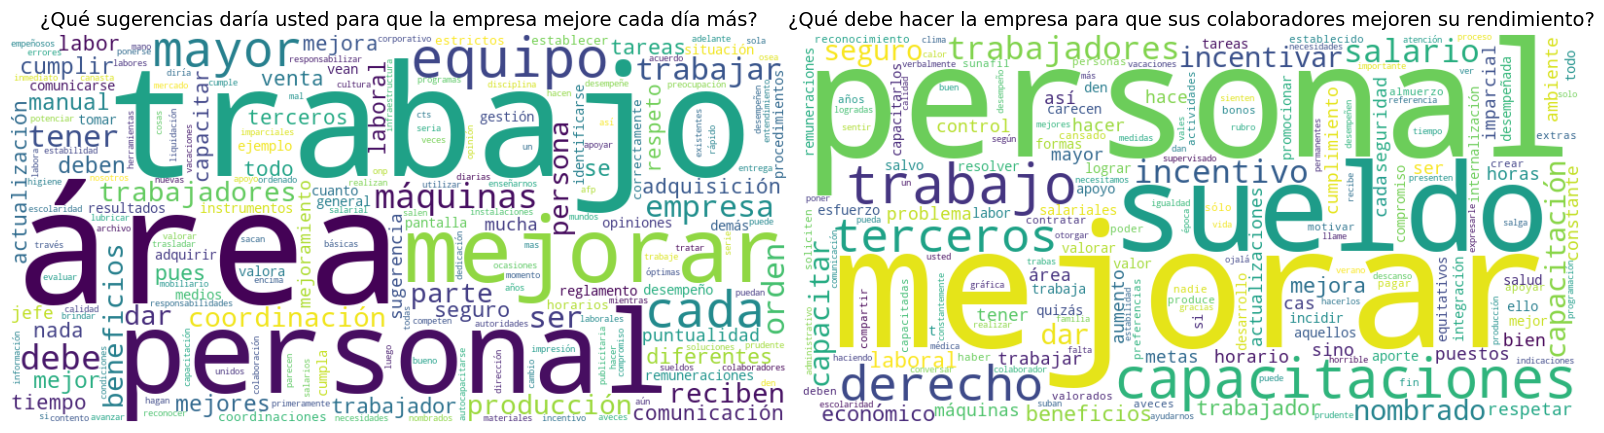

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preparar el texto para las dos preguntas
all_text_pregunta1 = ' '.join(df['preprocessed_pregunta_mejora'].dropna())
all_text_pregunta2 = ' '.join(df['preprocessed_pregunta_rendimiento'].dropna())

# Generar las nubes de palabras
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(all_text_pregunta1)
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(all_text_pregunta2)

# Crear una figura con dos subplots para mostrar las nubes de palabras lado a lado
plt.figure(figsize=(16, 8))  # Ajustar el tamaño de la figura para que sea más amplia

# Nube de Palabras para Pregunta 1
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')  # Quitar los ejes
plt.title('¿Qué sugerencias daría usted para que la empresa mejore cada día más?', fontsize=14)

# Nube de Palabras para Pregunta 2
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')  # Quitar los ejes
plt.title('¿Qué debe hacer la empresa para que sus colaboradores mejoren su rendimiento?', fontsize=14)

# Mostrar los gráficos
plt.tight_layout()  # Ajustar el layout para evitar superposiciones
plt.show()

**Interpretación nube de palabras respuesta a la pregunta: ¿Qué sugerencias daría usted para que la empresa mejore cada día más?** 

La nube de palabras a la pregunta 1 revela que las mejoras en el trabajo en equipo, mayor coordinación, mejor maquinaria y mejora de las condiciones laborales son las principales áreas que los empleados consideran claves para que la empresa mejore. Además, el énfasis en la capacitación del personal refuerza la importancia de brindar herramientas de crecimiento profesional como parte de las mejoras sugeridas.

**Interpretación nube de palabras respuesta a la pregunta: ¿Qué debe hacer la empresa para que sus colaboradores mejoren su rendimiento?** 

La nube de palabras a la pregunta 2 las palabras claramente enfatizan la necesidad de mejorar los sueldos, ofrecer incentivos y capacitaciones como las principales estrategias para mejorar su rendimiento. Además, se destaca una preocupación general por los derechos laborales y la necesidad de beneficios más sólidos para garantizar su bienestar y seguridad. En conjunto, las respuestas sugieren que los trabajadores no solo buscan mejoras económicas, sino también un entorno que fomente el desarrollo profesional y brinde protección laboral adecuada.

* **Paso 4: Análisis de sentimientos aplicado a las respuestas**

El análisis de sentimientos es una **técnica de procesamiento del lenguaje natural (NLP)** que **_se utiliza para identificar y clasificar automáticamente las emociones expresadas en textos_**, como comentarios o respuestas abiertas. Esta técnica permite asignar etiquetas de positivo, negativo, o neutral a cada texto, en función del tono o la polaridad del contenido.

El análisis de sentimientos **se implementa mediante algoritmos avanzados**, que pueden ser desde enfoques basados en reglas simples hasta modelos más complejos de machine learning y redes neuronales profundas. Estos algoritmos son capaces de captar el contexto del lenguaje y clasificar el texto de manera más precisa, incluso en grandes volúmenes de datos.

En un estudio de clima organizacional, esta técnica es especialmente útil para identificar rápidamente los patrones emocionales predominantes entre los empleados, lo que proporciona una visión más profunda sobre sus percepciones y bienestar emocional. Al automatizar este proceso, se pueden detectar sentimientos que podrían pasar desapercibidos en un análisis más tradcional, lo que facilita una toma de decisiones más ágil y basada en datos reales.

In [5]:
from textblob import TextBlob

# Función para obtener el sentimiento
def obtener_sentimiento(texto):
    analysis = TextBlob(texto)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negativo'

# Aplicar análisis de sentimiento a los comentarios de Pregunta 1
df['sentimiento_pregunta1'] = df['preprocessed_pregunta_mejora'].dropna().apply(obtener_sentimiento)

# Aplicar análisis de sentimiento a los comentarios de Pregunta 2
df['sentimiento_pregunta2'] = df['preprocessed_pregunta_rendimiento'].dropna().apply(obtener_sentimiento)

# Ver los resultados
print(df[['preprocessed_pregunta_mejora', 'sentimiento_pregunta1']].head())
print(df[['preprocessed_pregunta_rendimiento', 'sentimiento_pregunta2']].head())

                        preprocessed_pregunta_mejora sentimiento_pregunta1
0                                 cumplir reglamento               Neutral
1  tomar opiniones demás-mejorar situación labora...               Neutral
2  general personas deben identificarse empresa -...              Positivo
3             cada área cumpla manual procedimientos               Neutral
4  adquirir instrumentos equipos comunicarse mejo...               Neutral
                   preprocessed_pregunta_rendimiento sentimiento_pregunta2
0  resolver problema trabajar 3 formas: 1. nombra...               Neutral
1  -incidir capacitación -incentivar esfuerzo. -m...               Neutral
2  -mejorar remuneraciones -dar seguro salud aque...               Neutral
3     capacitarlos t hacer trabajadores den mejor si               Neutral
4  *lograr mayor integración internalización, com...               Neutral


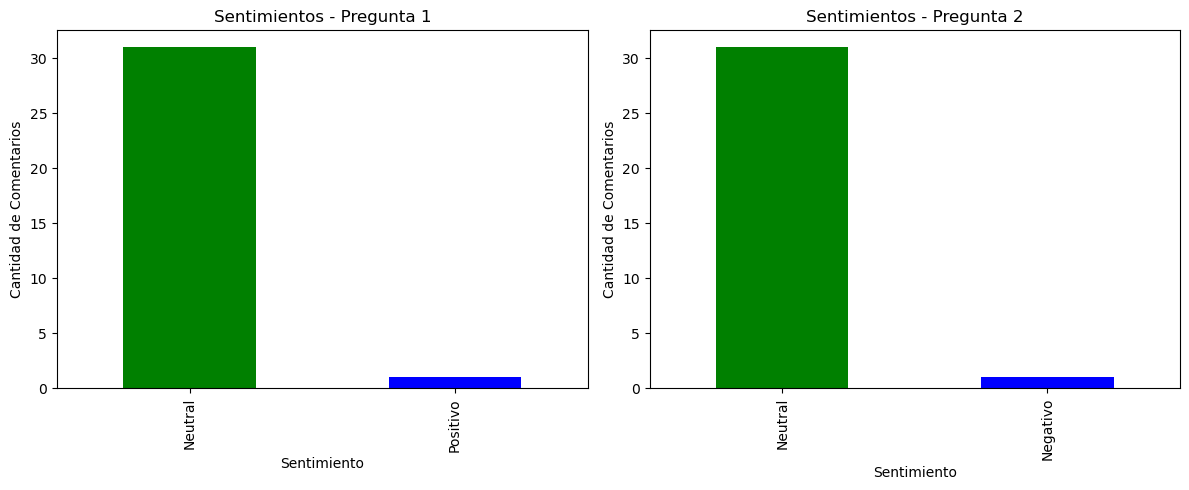

In [16]:
import matplotlib.pyplot as plt

# Contar la cantidad de comentarios en cada categoría de sentimiento para Pregunta 1
sentimiento_counts_pregunta1 = df['sentimiento_pregunta1'].value_counts()

# Contar la cantidad de comentarios en cada categoría de sentimiento para Pregunta 2
sentimiento_counts_pregunta2 = df['sentimiento_pregunta2'].value_counts()

# Crear una figura con dos subplots para mostrar los gráficos lado a lado
plt.figure(figsize=(12, 5))  # Ajustar el tamaño de la figura

# Gráfico de barras para Pregunta 1
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sentimiento_counts_pregunta1.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentimientos - Pregunta 1')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')

# Gráfico de barras para Pregunta 2
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
sentimiento_counts_pregunta2.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentimientos - Pregunta 2')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

**Interpretación**

El análisis de sentimientos revela una tendencia general a la neutralidad en las respuestas, con algunos comentarios que reflejan sentimientos más positivos o negativos. Esto indica que, si bien los empleados están proporcionando sugerencias útiles y prácticas, puede ser valioso **profundizar en los comentarios negativos de la segunda pregunta para comprender mejor las áreas problemáticas que podrían estar afectando el rendimiento laboral.**

* **Paso 5: Aplicación del algoritmo LDA para un análisis más profundo de las percepciones de los trabajadores**

El Latent Dirichlet Allocation (LDA) **es un algoritmo de modelado de temas** que se utiliza en el análisis de texto para descubrir temas ocultos dentro de un conjunto de documentos o respuestas. El algoritmo asume que cada documento está compuesto por una mezcla de temas, y que cada tema está formado por un grupo de palabras.

Aplicado al contexto de un estudio de clima organizacional, **LDA permite identificar los principales temas o preocupaciones que están presentes en los comentarios y respuestas abiertas de los empleados**. Este enfoque proporciona una forma más estructurada y automatizada de agrupar los pensamientos de los trabajadores en torno a ideas clave, facilitando un análisis más profundo y basado en patrones.

Al usar LDA, es posible obtener una visión clara de los temas recurrentes que preocupan o interesan a los empleados, permitiendo a la organización tomar decisiones informadas basadas en los temas predominantes que emergen de los datos cualitativos.

In [7]:
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Verificar si las stopwords ya están descargadas
try:
    # Intentar cargar las stopwords
    spanish_stopwords = stopwords.words('spanish')
except LookupError:
    # Si no están disponibles, descargarlas
    nltk.download('stopwords')
    spanish_stopwords = stopwords.words('spanish')

# 1. Convertir los comentarios de Pregunta 1 a "bag of words"
vectorizer1 = CountVectorizer(max_df=0.95, min_df=2, stop_words=spanish_stopwords)
text_bow_pregunta1 = vectorizer1.fit_transform(df['preprocessed_pregunta_mejora'])

# 2. Convertir los comentarios de Pregunta 2 a "bag of words"
vectorizer2 = CountVectorizer(max_df=0.95, min_df=2, stop_words=spanish_stopwords)
text_bow_pregunta2 = vectorizer2.fit_transform(df['preprocessed_pregunta_rendimiento'])

# 3. Aplicar LDA a Pregunta 1
lda_pregunta1 = LatentDirichletAllocation(n_components=3, random_state=42)
lda_pregunta1.fit(text_bow_pregunta1)

# 4. Aplicar LDA a Pregunta 2
lda_pregunta2 = LatentDirichletAllocation(n_components=3, random_state=42)
lda_pregunta2.fit(text_bow_pregunta2)

# 5. Mostrar los temas de Pregunta 1
terms1 = vectorizer1.get_feature_names_out()
for idx, topic in enumerate(lda_pregunta1.components_):
    print(f"Tema {idx+1} - Pregunta 1:")
    print([terms1[i] for i in topic.argsort()[-10:]])

# 6. Mostrar los temas de Pregunta 2
terms2 = vectorizer2.get_feature_names_out()
for idx, topic in enumerate(lda_pregunta2.components_):
    print(f"Tema {idx+1} - Pregunta 2:")
    print([terms2[i] for i in topic.argsort()[-10:]])

Tema 1 - Pregunta 1:
['ser', 'producción', 'dar', 'respeto', 'puntualidad', 'trabajar', 'tener', 'orden', 'equipo', 'trabajo']
Tema 2 - Pregunta 1:
['debe', 'equipos', 'actualización', 'mayor', 'beneficios', 'personal', 'parte', 'mejorar', 'empresa', 'máquinas']
Tema 3 - Pregunta 1:
['trabajo', 'mejorar', 'ser', 'trabajadores', 'mayor', 'coordinación', 'cada', 'debe', 'personal', 'áreas']
Tema 1 - Pregunta 2:
['personal', 'seguridad', 'sueldo', 'bien', 'constante', 'hace', 'trabajadores', 'mejorar', 'laboral', 'capacitación']
Tema 2 - Pregunta 2:
['cada', 'máquinas', 'capacitaciones', 'sueldos', 'así', 'trabajos', 'puestos', 'personal', 'mejorar', 'salario']
Tema 3 - Pregunta 2:
['nombrado', 'incentivar', 'capacitaciones', 'beneficios', 'incentivos', 'dar', 'mejorar', 'sueldos', 'terceros', 'personal']


**Interpretación:**

* Pregunta 1: Las respuestas reflejan la necesidad de mejorar la organización interna, la infraestructura, y el trabajo en equipo. Los empleados creen que la empresa puede mejorar si invierte en equipos y máquinas actualizadas, fomenta el respeto y la puntualidad, y mejora la coordinación entre áreas.

* Pregunta 2: Los empleados consideran que para mejorar su rendimiento, la empresa debe ofrecer mayores incentivos (sueldos, beneficios), capacitación constante, y asegurar mejores condiciones laborales. Además, parece haber cierta preocupación por la tercerización o externalización de tareas, lo que podría estar afectando el compromiso y la motivación del personal.

**En resumen, ambos temas reflejan un fuerte interés por mejorar tanto los recursos como las condiciones de trabajo, con un enfoque en la capacitación y la seguridad laboral como elementos clave para el crecimiento y mejora del rendimiento dentro de la empresa.**

## **Las tres técnicas evidencian resultados consistentes:**

El uso complementario de tres técnicas de análisis cualitativo—nube de palabras, análisis de sentimientos y Latent Dirichlet Allocation (LDA)—ha permitido validar los resultados de manera consistente en este estudio de clima organizacional, ofreciendo un enfoque más robusto y confiable en comparación con enfoques tradicionales.

Cada técnica aporta una capa de análisis distinta, que no solo revela temas claves desde diferentes perspectivas, sino que también refuerza los hallazgos de las otras. La nube de palabras facilita la identificación rápida de términos recurrentes que reflejan las preocupaciones más comunes; el análisis de sentimientos clasifica las respuestas en términos emocionales, proporcionando una visión clara de cómo se perciben estas preocupaciones; y el LDA agrupa las respuestas en temas latentes que profundizan aún más en las percepciones de los empleados.

**Este enfoque múltiple es crucial para garantizar la confiabilidad de los resultados, un aspecto que a menudo se pasa por alto en muchos estudios de clima organizacional realizados a través de plataformas genéricas o encuestas sin pruebas de validación estadística adecuadas. En diversas organizaciones, se utilizan instrumentos estandarizados como escalas y encuestas sin tomar en cuenta la complejidad y diversidad de las dinámicas internas. Como resultado, las métricas derivadas de estos estudios pueden no reflejar adecuadamente la realidad del entorno laboral, lo que puede llevar a la implementación de estrategias ineficaces o mal orientadas.**

El hecho de que estas tres técnicas de análisis se complementen y validen mutuamente refuerza la confianza en los resultados obtenidos. En contraste con la administración de pruebas genéricas que no contemplan la validación estadística de los instrumentos, el enfoque aquí utilizado garantiza que los resultados no solo sean precisos, sino también representativos de la verdadera complejidad de las percepciones de los empleados. A lo largo de los años, he observado que muchas empresas no están familiarizadas con la importancia de la validación de sus instrumentos a través de técnicas estadísticas, lo cual puede comprometer la calidad de los estudios y las decisiones que se toman basándose en ellos.

Por lo tanto, esta metodología no solo proporciona un análisis más profundo y preciso, sino que también asegura que las intervenciones derivadas de estos resultados sean más eficaces y estén mejor alineadas con las realidades y necesidades particulares de cada organización.

* **Paso 6: Comparación de los resultados obtenidos mediante la teoría fundamentada y las técnicas de ciencia de datos**

En esta sección se presenta una comparación entre los resultados obtenidos utilizando el método de la teoría fundamentada y los alcanzados a través de tres técnicas de ciencia de datos: nube de palabras, análisis de sentimientos y Latent Dirichlet Allocation (LDA). La teoría fundamentada, aplicada de manera manual, permitió identificar temas claves mediante un análisis interpretativo profundo. No obstante, la incorporación de técnicas avanzadas de ciencia de datos ha permitido automatizar el proceso de identificación de patrones y emociones, brindando una perspectiva más eficiente y complementaria.

El objetivo de esta comparación es evaluar la consistencia y complementariedad de ambos enfoques, identificando cómo las técnicas de ciencia de datos no solo validan los hallazgos obtenidos previamente, sino que también permiten una mayor profundización en las percepciones de los empleados. Esta integración metodológica ofrece una visión más robusta del análisis de clima organizacional, al combinar el rigor cualitativo de la teoría fundamentada con las capacidades automatizadas de la ciencia de datos.

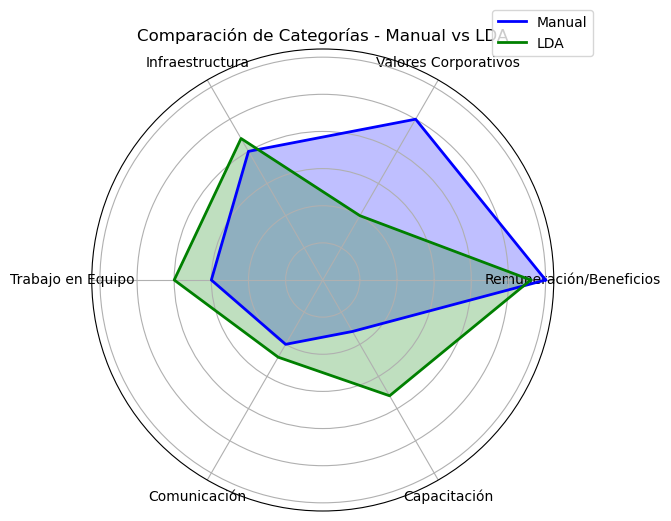

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir categorías y valores manuales y de LDA
categorias = ['Remuneración/Beneficios', 'Valores Corporativos', 'Infraestructura', 
              'Trabajo en Equipo', 'Comunicación', 'Capacitación']

valores_manual = [30, 25, 20, 15, 10, 8]
valores_lda = [28, 10, 22, 20, 12, 18]

# Número de categorías
N = len(categorias)

# Ángulos para cada categoría en el gráfico
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Cerrar el gráfico uniendo los primeros y últimos puntos
valores_manual += valores_manual[:1]
valores_lda += valores_lda[:1]
angles += angles[:1]

# Iniciar la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Gráfico para el análisis manual
ax.fill(angles, valores_manual, color='blue', alpha=0.25)
ax.plot(angles, valores_manual, color='blue', linewidth=2, label='Manual')

# Gráfico para el análisis de LDA
ax.fill(angles, valores_lda, color='green', alpha=0.25)
ax.plot(angles, valores_lda, color='green', linewidth=2, label='LDA')

# Configuración de etiquetas
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, fontsize=10)

plt.title('Comparación de Categorías - Manual vs LDA')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

**Comparación general:**

El gráfico muestra claramente cómo las categorías identificadas manualmente (en azul) se comparan con las identificadas por LDA (en verde). Aunque hay ciertas similitudes, se puede observar que hay variaciones importantes en algunas categorías, lo que indica que ambas metodologías pueden resaltar distintos aspectos de las respuestas, complementándose mutuamente.
Áreas con coincidencia significativa:

* Remuneración/Beneficios: Esta categoría es fuerte tanto en el análisis manual como en el análisis con LDA, lo que sugiere que la compensación económica es un tema recurrente y central en las respuestas de los empleados, sin importar el método aplicado.

* Capacitación: Otra área en la que ambos enfoques coinciden fuertemente. Esto confirma que los empleados consideran la capacitación como una clave importante para el crecimiento y rendimiento dentro de la organización.

**Diferencias notables:**

* Infraestructura: El análisis manual resalta más este tema en comparación con el LDA. Esto podría indicar que el análisis manual, por su naturaleza interpretativa, permitió una mayor sensibilidad a las menciones de los empleados sobre aspectos físicos y materiales de la organización, como máquinas y recursos.

* Valores Corporativos: Al contrario, el análisis LDA parece captar más detalles sobre valores corporativos, probablemente porque la técnica automatizada permite detectar patrones ocultos y términos que pueden estar indirectamente relacionados con estos temas, lo cual puede ser más difícil de percibir manualmente.

**En aspectos como Trabajo en Equipo y Comunicación, ambas técnicas identifican de manera similar la importancia de estas áreas, aunque el análisis manual parece haber enfatizado más el trabajo en equipo, mientras que LDA destaca más los temas de comunicación.**

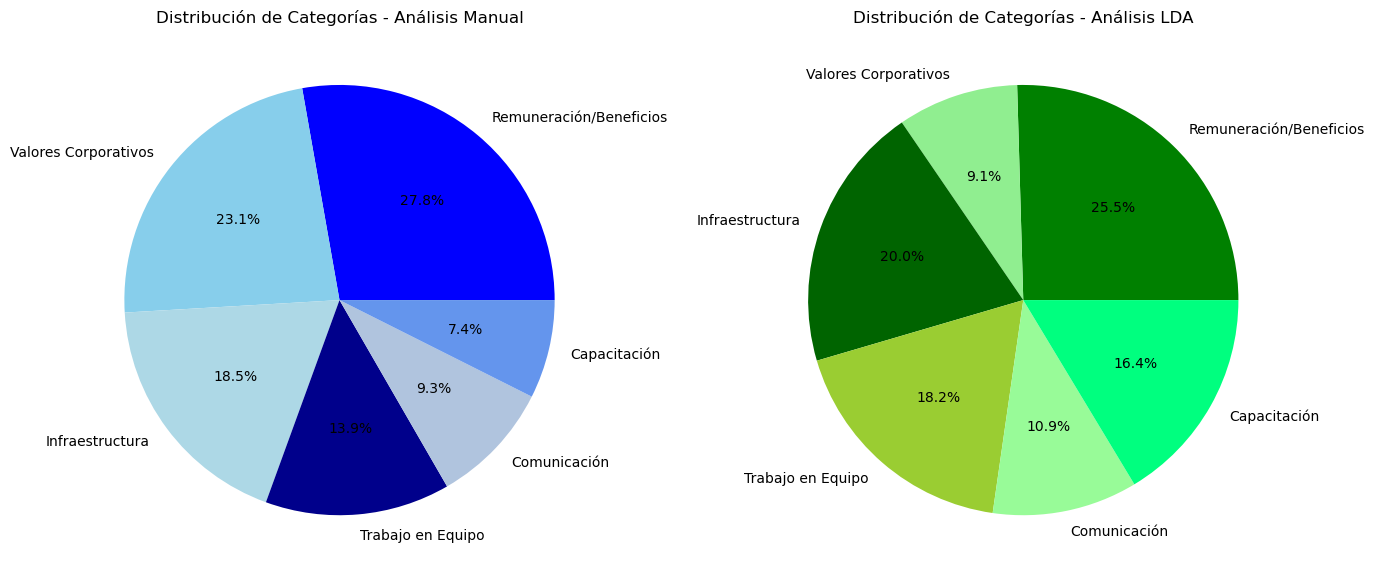

In [12]:
# Definir categorías y valores manuales y de LDA
categorias = ['Remuneración/Beneficios', 'Valores Corporativos', 'Infraestructura', 
              'Trabajo en Equipo', 'Comunicación', 'Capacitación']

# Resultados 
valores_manual = [30, 25, 20, 15, 10, 8]  # Valores del análisis manual
valores_lda = [28, 10, 22, 20, 12, 18]  # Valores del análisis LDA

# Ajustar el tamaño de la figura
plt.figure(figsize=(14, 7))  # Ancho mayor para que los gráficos quepan lado a lado

# Gráfico de pastel para análisis manual
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.pie(valores_manual, labels=categorias, autopct='%1.1f%%', colors=['blue', 'skyblue', 'lightblue', 'darkblue', 'lightsteelblue', 'cornflowerblue'])
plt.title('Distribución de Categorías - Análisis Manual')

# Gráfico de pastel para LDA
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.pie(valores_lda, labels=categorias, autopct='%1.1f%%', colors=['green', 'lightgreen', 'darkgreen', 'yellowgreen', 'palegreen', 'springgreen'])
plt.title('Distribución de Categorías - Análisis LDA')

# Mostrar ambos gráficos
plt.tight_layout()  # Para ajustar los espacios entre gráficos
plt.show()

**Interpretación:**

Ambos análisis coinciden en la relevancia de la remuneración/beneficios y de la infraestructura, lo que subraya que estas áreas son consistentemente prioritarias para los empleados. Sin embargo, el análisis LDA ha permitido detectar nuevas áreas de interés, como la coordinación y los incentivos, que complementan los resultados obtenidos manualmente. Además, el peso relativo de algunas categorías, como la capacitación, es más alto en LDA, lo que puede indicar que el algoritmo ha captado la importancia de este tema de manera más precisa.

Ambos enfoques son valiosos y se complementan entre sí, reforzando la validez de los resultados y aportando una visión más amplia y detallada del clima organizacional.

## **Conclusiones del estudio:**

* **1. Limitaciones de los estudios tradicionales de clima organizacional:** Los enfoques basados exclusivamente en escalas cuantitativas, como las encuestas anuales, proporcionan una visión general del ambiente laboral, pero frecuentemente no logran capturar la complejidad emocional de los empleados ni las causas profundas de su malestar o insatisfacción. Esto limita la eficacia de las estrategias que se implementan a partir de estos estudios, que tienden a ser superficiales y menos impactantes.

* **Obsolescencia de las encuestas tradicionales:** Las encuestas de clima organizacional, al realizarse con poca frecuencia y con fines principalmente administrativos, están quedando obsoletas frente a las demandas de organizaciones más ágiles y proactivas. Estos estudios puntuales no permiten captar las fluctuaciones emocionales que ocurren en tiempo real dentro de la organización, lo que retrasa la toma de decisiones oportunas.

* **Innovación en la medición de emociones en tiempo real:** La adopción de tecnologías avanzadas, como el análisis de sentimientos y el uso de dispositivos de biofeedback, ofrece a las organizaciones la capacidad de medir y comprender las emociones de los empleados de manera continua y en tiempo real. Estas herramientas permiten identificar señales tempranas de estrés, frustración o motivación, lo que habilita a las empresas a actuar preventivamente antes de que los problemas escalen.

* **Diversificación de canales para captar percepciones:** La integración de múltiples canales de comunicación, como buzones de sugerencias digitales, encuestas de satisfacción en actividades o plataformas internas de retroalimentación continua, proporciona una visión más dinámica y precisa del clima organizacional. A diferencia de los estudios tradicionales, estos canales fomentan la participación activa y anónima, generando un flujo constante de información sobre las necesidades y emociones de los empleados.

* **Impacto en la productividad y bienestar:** Al implementar un sistema de captura constante de emociones y percepciones, las organizaciones pueden mejorar significativamente tanto el clima laboral como la retención de talento. Las decisiones basadas en datos emocionales en tiempo real permiten a los líderes actuar con mayor rapidez y precisión, lo que no solo eleva la satisfacción de los empleados, sino que también incrementa la productividad y el bienestar general dentro de la organización.

## **Casos de aplicación en los que se usa Machine Learning para mejorar la gestión de personas en las Organizaciones:**

* **Turkish Post Corporation:** En una iniciativa de gestión de recursos humanos, se utilizó machine learning para desarrollar un modelo de predicción de carreras. Utilizando grandes volúmenes de datos de empleados, se implementaron algoritmos como k-Nearest Neighbor (kNN) y Random Forest (RF) para predecir candidatos a puestos de liderazgo. Este enfoque permitió identificar patrones en los datos de rendimiento y experiencia de los empleados, mejorando la toma de decisiones en promociones y gestión de talento en una empresa de gran tamaño. 
Enlace a la fuente: https://www.mdpi.com/2076-3417/14/15/6679

* En un caso de éxito reportado por una empresa china del sector manufacturero, se implementó machine learning para mejorar el clima organizacional y el rendimiento de los empleados. La empresa utilizó un enfoque de análisis de sentimientos y Latent Dirichlet Allocation (LDA) para analizar miles de comentarios de empleados recogidos de encuestas internas y plataformas de retroalimentación continua.
Enlace a la fuente: https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0304729 